<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [12]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


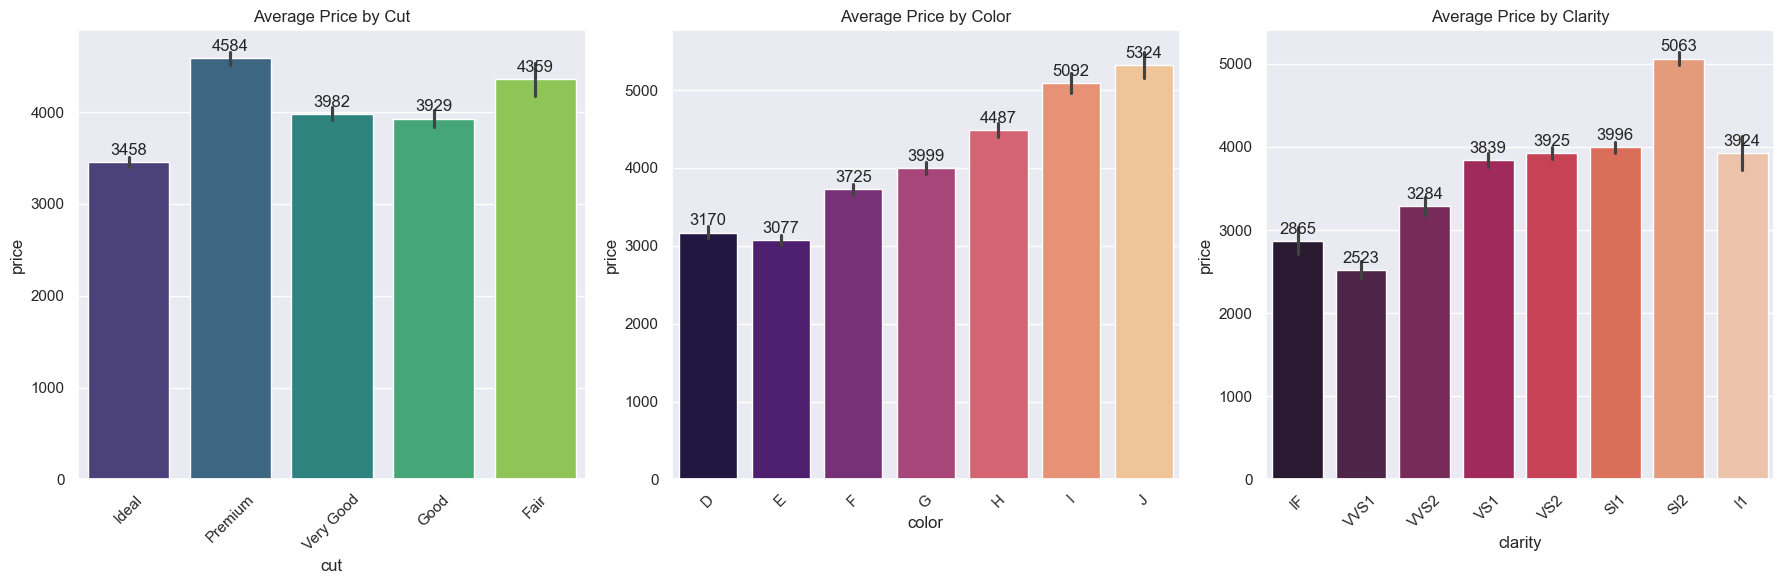

In [17]:
# Create a figure with 3 subplots side by side
plt.figure(figsize=(18, 6))

# Plot 1: Cut distribution
plt.subplot(131)
ax1 = sns.barplot(data=diamonds, x='cut', y='price', estimator=np.mean, palette='viridis')
plt.title('Average Price by Cut')
plt.xticks(rotation=45)

# Add value labels on bars
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.0f', padding=3)

# Plot 2: Color distribution  
plt.subplot(132)
ax2 = sns.barplot(data=diamonds, x='color', y='price', estimator=np.mean, palette='magma')
plt.title('Average Price by Color')
plt.xticks(rotation=45)

# Add value labels on bars
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.0f', padding=3)

# Plot 3: Clarity distribution
plt.subplot(133)
ax3 = sns.barplot(data=diamonds, x='clarity', y='price', estimator=np.mean, palette='rocket')
plt.title('Average Price by Clarity')
plt.xticks(rotation=45)

# Add value labels on bars
for i in ax3.containers:
    ax3.bar_label(i, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()



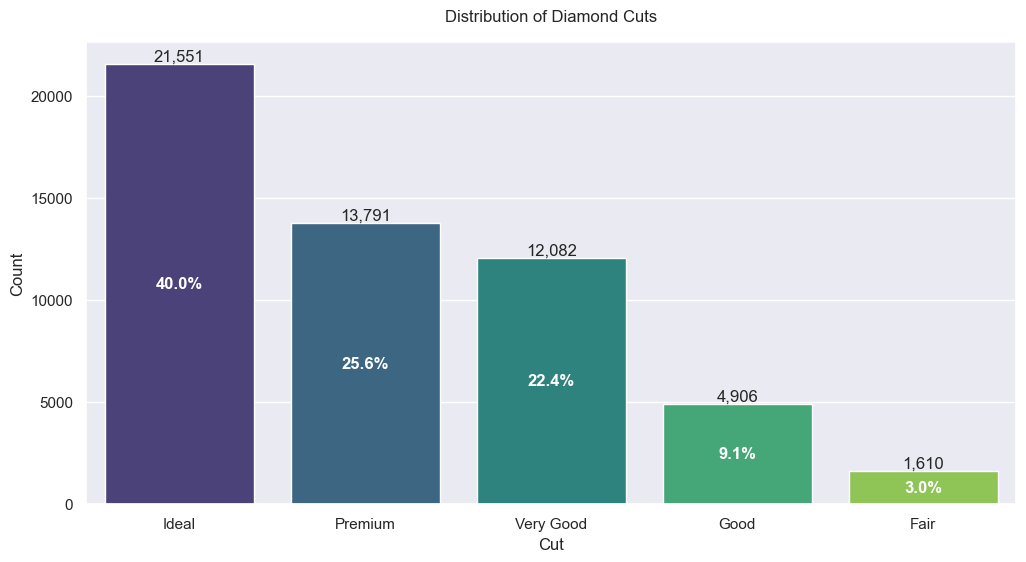

In [6]:
plt.figure(figsize=(12, 6))

# Create count plot
ax = sns.countplot(data=diamonds, x='cut', palette='viridis')

# Get total count
total = len(diamonds)

# Add count and percentage labels on bars
for i, p in enumerate(ax.patches):
    count = p.get_height()
    percentage = (count/total) * 100
    
    # Add count on top
    ax.text(p.get_x() + p.get_width()/2., count, 
            f'{int(count):,}',
            ha='center', va='bottom')
    
    # Add percentage in middle
    ax.text(p.get_x() + p.get_width()/2., count/2,
            f'{percentage:.1f}%',
            ha='center', va='center',
            color='white', fontweight='bold')

plt.title('Distribution of Diamond Cuts', pad=15)
plt.xlabel('Cut')
plt.ylabel('Count')

plt.show()




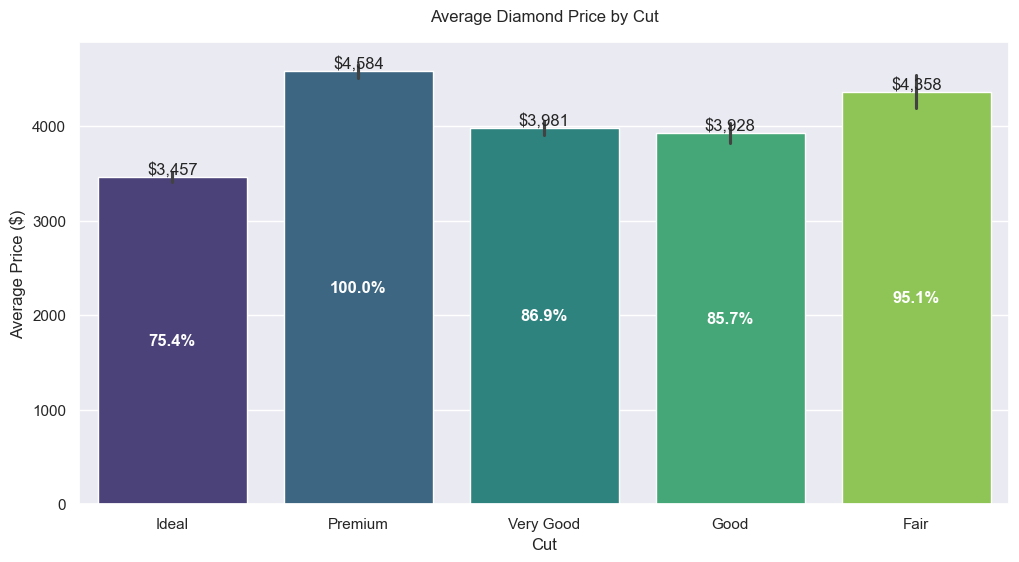

In [8]:
plt.figure(figsize=(12, 6))

# Calculate mean price for each cut
mean_prices = diamonds.groupby('cut')['price'].mean()

# Create bar plot
ax = sns.barplot(data=diamonds, x='cut', y='price', estimator=np.mean, palette='viridis')

# Get the maximum price for scaling the percentage labels
max_price = mean_prices.max()

# Add mean price and percentage labels on bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = (height/max_price) * 100
    
    # Add mean price on top
    ax.text(p.get_x() + p.get_width()/2., height,
            f'${int(height):,}',
            ha='center', va='bottom')
    
    # Add percentage in middle
    ax.text(p.get_x() + p.get_width()/2., height/2,
            f'{percentage:.1f}%',
            ha='center', va='center',
            color='white', fontweight='bold')

plt.title('Average Diamond Price by Cut', pad=15)
plt.xlabel('Cut')
plt.ylabel('Average Price ($)')

plt.show()



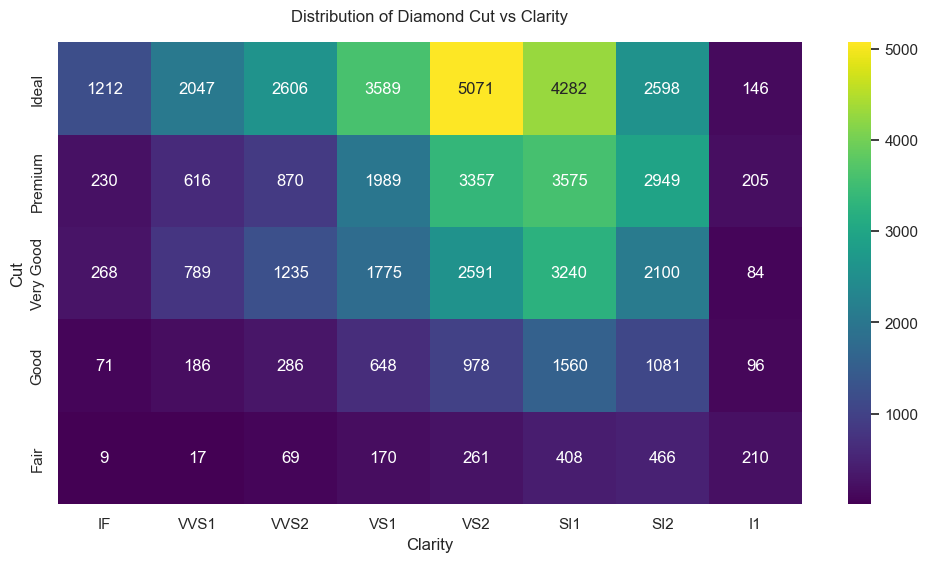

In [10]:
plt.figure(figsize=(12, 6))

# Create a crosstab of cut and clarity
cut_clarity_counts = pd.crosstab(diamonds['cut'], diamonds['clarity'])

# Create heatmap
sns.heatmap(cut_clarity_counts, annot=True, fmt='d', cmap='viridis')

plt.title('Distribution of Diamond Cut vs Clarity', pad=15)
plt.xlabel('Clarity')
plt.ylabel('Cut')

plt.show()



## 1.0 Variable Identification

In [3]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### 2.2 For categorical variables: frequency table, count plot

## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

### 3.2 Categorical & Categorical: stacked column chart

### 3.3 Categorical & Continuous: boxplots

### 3.4 Correlation Analysis: correlation matrix

## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64